# Applying Filtering and Coarse-Graining to Generate Low Resolution Datasets

Now that we've run our high resolution simulations, we can apply the different filtering and coarse-graining operators used in the paper to generate low resolution datasets. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pyqg
from pyqg.diagnostic_tools import calc_ispec as _calc_ispec
import pyqg_parameterization_benchmarks.coarsening_ops as coarsening

%matplotlib inline

We now need to initialize both high and low resolution models. From the high resolution simulations we will generate filtered and coarsened low resolution simulations that approximate or generalize to simulations made using low resolution models. We can run low resolution simulations in the same manner in which we previously ran our high resolution simulations with the modification of changing the argument value for the `nx` parameter defined in `pyqg.QGModel` when initializing our model.

In [3]:
high_res_eddy_model = pyqg.QGModel(nx=256, dt=3600.0, tmax=311040000.0, tavestart=155520000.0, log_level=0)
high_res_eddy_model.run()

We now initialize our filtering and coarse-graining operators. Each of the following operators are defined in more detail withinin the paper. The operator methods take in two parameters: the high resolution model to be filtered and coarsened and the resolution at which to filter and coarsen down to.

In [ ]:
op1 = coarsening.Operator1(high_res_eddy_model, 64) # spectral truncation + sharp filter
op2 = coarsening.Operator2(high_res_eddy_model, 64) # spectral truncation + softer Gaussian filter
op3 = coarsening.Operator3(high_res_eddy_model, 64) # GCM-Filters + real-space coarsening
ops = [op1, op2, op3]

## Utilizing Preexisting Datasets

As promised, we will discuss the structure of the remaining sub-directories. 

```
eddy/
    high_res.zarr
    low_res.zarr
    forcing1.zarr
    forcing2.zarr
    forcing3.zarr
jet/
    high_res.zarr
    low_res.zarr
    forcing1.zarr
    forcing2.zarr
    forcing3.zarr
```

`low_res.zarr` contains snapshots and diagnostics for low resolution eddy-configured models (`nx=64`), where the grid length is slightly less than the deformation radius.

`forcing{1,2,3}.zarr` contain high resolution snapshots that have been filtered and coarsened down to low resolution, along with associated subgrid forcing variables. There are three of these datasets due to the fact that we applied three different filtering and coarse-graining operators on the high resolution datasets.

## Visualizing Effects

We will now visualize the effects of applying the three different methods of filtering and coarse-graining respectively to high resolution eddy configurations low resolution on state variables and resulting subgrid forcing terms. 

In [5]:
# Helper function to display plot 
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

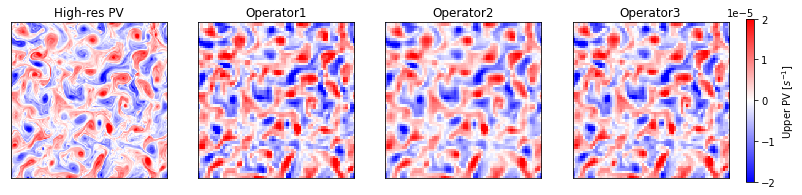

In [16]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='High-res PV')
imshow(high_res_eddy_model.q[0])
for j, op in enumerate(ops):
    plt.subplot(1,4,j+2, title=op.__class__.__name__)
    im = imshow(op.m2.q[0], vlim=2e-5)
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

From each of the resulting coarsened PV snapshots, it is difficult to see the differences that distinguish them. We can turn to looking at the subgrid forcing to better depict the constrast.

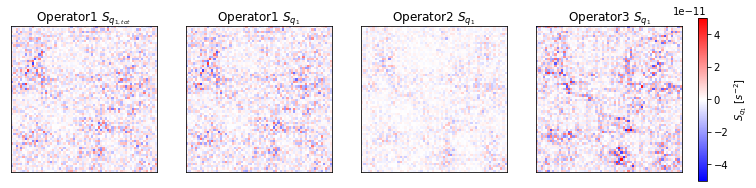

In [18]:
# Visualizing effects on upper PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,4,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 5e-11)
for j, op in enumerate(ops):
    plt.subplot(1,4,j+2, title=op.__class__.__name__ + " $S_{q_1}$")
    im = imshow(op.subgrid_forcing('q')[0], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')

## Troubleshooting Tips
The following sections provides some potential solutions to any issues come across when attempting to run any of the above portions of code in the Jupyter notebook environment or otherwise similar.

- *I am running into a* `ModuleNotFoundError: No module named 'pyqg_parameterization_benchmarks.coarsening_ops'` *error and using* `pip install pyqg_parameterization_benchmarks` *lead to version/distribution errors.*

```
# Clone the repository
%%bash
git clone https://github.com/m2lines/pyqg_parameterization_benchmarks.git
```
```
cd pyqg_parameterization_benchmarks
```
```
# Install the requirements
pip install -r requirements.txt --user
```
```
# Install locally as a package 
pip install --editable 
```